<a href="https://colab.research.google.com/github/ItsShi/Mono-Depth/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdown
import shutil

scene_url = 'https://drive.google.com/uc?id=1xZwB0qFWbU7EjjI1g-Y0pqAs1_nWwU6Z'
gdown.download(scene_url, 'scene.tar.gz', quiet=True)

shutil.unpack_archive('scene.tar.gz', 'd3k1_tiffs')

In [3]:
import gdown

video_url = 'https://drive.google.com/uc?id=1c_ewx6wts7pJTb3XVWVXEZLbFXDObpdP'
gdown.download(video_url,'SCARED_video.zip',quiet=True) 

!unzip -q /content/SCARED_video.zip

In [10]:
!pip install ffmpeg

!ffmpeg -i /content/SCARED_video/d3k1_rgb.mp4 %10d.png

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=0440e80cfcd4d0c51966c13d85c6347bcdf82c3728527b75707057232300037d
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg
ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontc

(<Axes: >, <matplotlib.image.AxesImage at 0x7f8c11385060>)

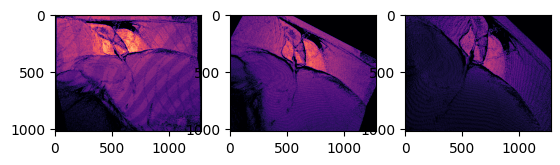

In [16]:
import tifffile
import matplotlib.pyplot as plt
import os

current_scene = tifffile.imread(os.path.join('d3k1_tiffs', "scene_points%.6d.tiff" % 1))[:1024,:,:][:,:,2]
plt.subplot(131),plt.imshow(current_scene, cmap='magma')
current_scene = tifffile.imread(os.path.join('d3k1_tiffs', "scene_points%.6d.tiff" % 150))[:1024,:,:][:,:,2]
plt.subplot(132),plt.imshow(current_scene, cmap='magma')
current_scene = tifffile.imread(os.path.join('d3k1_tiffs', "scene_points%.6d.tiff" % 300))[:1024,:,:][:,:,2]
plt.subplot(133),plt.imshow(current_scene, cmap='magma')

(<Axes: >, <matplotlib.image.AxesImage at 0x7f8c0371b250>)

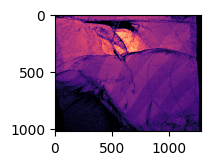

In [26]:
import cv2
import numpy as np

depth_gt = cv2.imread('/content/d3k1_tiffs/scene_points000000.tiff', 3)[:, :, 0][0:1024, :].astype(np.float32)
plt.subplot(131), plt.imshow(gt_depth, cmap='magma')

In [11]:
!pip -q install tensorboardX==1.4
!pip -q install torchvision==0.12.0

!git clone https://github.com/ItsShi/MonoDepth.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 2.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.11.0 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 1.11.0 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 1.11.0 which is incompatible.
Cloning into 'MonoDepth'...
remote: Enumerating objects: 142, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 142 (delta 54), reused 83 (delta 27), pack-reused 4
Receiving objects: 100% (142/142), 10.42 MiB | 30.92 MiB/s, done.
Resolving de

1.   argparse choices
2.   create splits text file, 
following the format in repo:

> 'dataset7/keyframe4	250	 l'

format of own data:

> 'd1k1_left_depth_map' and 'd1k1_Left_Image'

> content/d3k1_tiffs/scene_points000000.tiff

3. elif opt.split == "endovis": ...


```
        elif opt.split == "endovis":
            print(line, folder, frame_id)
            f_str = "scene_points{:06d}.tiff".format(frame_id - 1)
            gt_depth_path = os.path.join(
                opt.data_path,
                folder,
                "image_02/data/groundtruth",
                f_str)
            depth_gt = cv2.imread(gt_depth_path, 3)
            depth_gt = depth_gt[:, :, 0]
            gt_depth = depth_gt[0:1024, :]
```


```
        elif opt.split == "endovis":
            
            f_str = "scene_points{:06d}.tiff".format(frame_id - 1)
            gt_depth_path = os.path.join(
                "content",
                # opt.data_path,
                folder,
                # "image_02/data/groundtruth",
                f_str)
            depth_gt = cv2.imread(gt_depth_path, 3)
            depth_gt = depth_gt[:, :, 0]
            gt_depth = depth_gt[0:1024, :]
```



4. 

In [22]:
!touch test_files.txt

with open("test_files.txt", "w+") as f:
      # f.write("d3k1_Left_Image\t1\tl\n") # f.write("d{}k{}_left_depth_map".format(i, j))
      f.write("d3k1_tiffs\t1\tl\n") # f.write("d{}k{}_left_depth_map".format(i, j))

%pwd
!mv -f /content/test_files.txt /content/MonoDepth/splits/endovis/test_files.txt

In [27]:
%cd MonoDepth
!python export_gt_depth.py --data_path SCARED --split endovis # !python export_gt_depth.py --data_path kitti_data --split eigen_benchmark
# !python evaluate_depth.py --load_weights_folder ~/tmp/mono_model/models/weights_19/ --eval_mono
%cd ..

/content/MonoDepth
Exporting ground truth depths for endovis
[ WARN:0@0.014] global loadsave.cpp:244 findDecoder imread_('content/d3k1_tiffs/scene_points000000.tiff'): can't open/read file: check file path/integrity
Traceback (most recent call last):
  File "/content/MonoDepth/export_gt_depth.py", line 79, in <module>
    export_gt_depths_kitti()
  File "/content/MonoDepth/export_gt_depth.py", line 66, in export_gt_depths_kitti
    depth_gt = depth_gt[:, :, 0]
TypeError: 'NoneType' object is not subscriptable
/content
